# Project Milestone 3: Acquire and Understand the Data

Project Group Members:
- Geoffrey Humphreys
- Amir Koupaei
- Chris Moon
- Connor Poetzinger

Wednesday, April 10, 2024

## Overview

This notebook contains the code and analysis for the third milestone of our project. The objective of this milestone focuses on preparing the [data set](https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset) for subsequent analysis. For submission, follow the Milestone Checklist below.

**Milestone Checklist:**
- Access: Download, collect, or scrape* the dataset from the relevant source(s).
  - **Achieved by downloading the dataset from Kaggle.**
- Load: Start a new Jupyter Notebook, import necessary Python libraries and load your data set for inspection.
  - **Achieved by using the `pandas` library to load the dataset.**
- Understand: Examine the dataset. Ensure you understand the different features and their data types.
  - **Achieved by previewing the data, examining summary statistics, data types, missing values, and more**
- Preprocessing: Document any cleaning or preprocessing setup that may be necessary/required. This portion only includes the preprocessing steps, not the actual execution of the steps.
  - **Achieved by identifying and documenting the preprocessing steps necessary for the dataset.**
  

#### add this stuff for Milestone 3

Data Description: Provide any missing information from Milestone 2 based on the feedback you received from your TA. If your milestone 2 was complete and you didn’t miss anything, you can omit this point.

Summary of the Data: Provide the shape of the data, data types, and descriptive statistics such as mean, max, and dtypes. Additionally, provide a summary of the features of the data, including histograms, correlation plots, and clustering plots as appropriate. 

Data Anaylsis: Identify patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.

Meaningful Insights: Based on your analysis of the data, provide meaningful insights. Meaningful insights are those that connect back to your problem and are relevant to your specific context. Any insights should be well-supported by the data, provide actionable recommendations, and have a brief justification for why or how it’s important to the project. 

Clean and Labeled Visualization: Visualization is an important component of EDA and should be clean, labeled, and well-presented. You need to ensure that your visualizations are easy to understand and can be included in their final presentation slides or report. Anyone that reads your EDA should be able to understand what is depicted in the plots just by looking at them.

Summary of findings: Summarize your findings in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

(Revised) Project Question: Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

## Data Set Information and Background

In our group project, we are focusing on the critical task of distinguishing between genuine and counterfeit product reviews leveraging a specially curated dataset designed to mirror the complexities and nuances found in real-world online review platforms. This dataset contains a balanced collection of 40,000 product reviews, equally divided into two distinct categories:
- **Original Reviews**: Genuine product reviews written by real customers.
**Computer-Generated Fake Reviews**: Counterfeit product reviews generated by an algorithm.

Each review in the dataset is annotated according to its source category (OR or GC), enabling us to train and evaluate machine learning models to classify reviews as genuine or counterfeit. The dataset is stored in a CSV file, with each row representing a single review and containing the following columns:
1. `category`: Product category
2. `rating`: Rating of the product
3. `label`: Label indicating whether the review is fake or real
4. `text`: Review text

## Import the Data

The data is available in a CSV file named `fake_reviews.csv`. We will load the data into a pandas DataFrame and examine the first few rows to understand the structure of the data.

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import re

from bs4 import BeautifulSoup
from pandarallel import pandarallel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

import matplotlib.pyplot as plt
import numpy as np

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("../../data/raw/fake reviews dataset.csv")
df.shape

(40432, 4)

- **Rows:** 40,432
- **Columns:** 4

In [3]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.tail()

,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...


In [5]:
df.sample(5)

,category,rating,label,text_
28793,Books_5,5.0,CG,Brilliant from beginning to end. I love the w...
28522,Books_5,5.0,CG,Good book especially if you are an avid reader...
38554,Clothing_Shoes_and_Jewelry_5,1.0,CG,"I'm not very hard on the ankle, but the ankle ..."
22923,Pet_Supplies_5,2.0,CG,Bought a Cats Pride litter box. The cat box is...
35133,Toys_and_Games_5,5.0,OR,This play set is fantastic! It is beautifully ...


By previewing the data, we can see there are reviews for various product categories with a rating between 1 and 5. The `text_` column contains the review text with messy data that will require preprocessing to clean and prepare for analysis. For this type of task (cleaning unstructured text data), we will need to use natural language processing (NLP) techniques to process the text data effectively.

In [6]:
# Check for missing values
df.isna().mean()

category    0.0
rating      0.0
label       0.0
text_       0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df["category"].value_counts()

Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: category, dtype: int64

In [9]:
df["label"].value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [10]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Lucky for us, the dataset contains no missing values, its classes are balanced, and the data types are easy to work with. We can focus on cleaning the text data and preparing it for analysis. The independent structured data columns (`category`, `rating`) will be useful for exploratory data analysis (EDA) and feature engineering. For modeling, we should consider One Hot encoding the `category` column and standardizing the `rating` column. The dependent variable `label` will be Label Encoded to prepare for classification modeling.

## Preprocessing Steps

Here we define the preprocessing steps necessary for the dataset. SKlearn's custom transformers will be used to implement these steps in the subsequent milestone. The preprocessing steps include:
1. **Text Cleaning**: Remove special characters, punctuation, stopwords, and perform lemmatization. The package `nltk` will be used for this task.
2. **One-Hot Encoding**: Encode the `category` column using one-hot encoding.
3. **Standardization**: Standardize the `rating` column to ensure all features are on the same scale.
4. **Label Encoding**: Encode the `label` column to convert the target variable into numerical format.

In [11]:
# Initialization
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
class TextCleanerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        # Using pandarallel for parallel processing
        X_copy[self.column_name] = X_copy[self.column_name].parallel_apply(
            self.clean_text
        )
        return X_copy

    @staticmethod
    def clean_text(text):
        text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
        text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
        text = re.sub(r"[^a-zA-Z\s]", "", text)  # Keep only alphabets
        text = text.lower()  # Convert to lowercase
        tokens = word_tokenize(text)  # Tokenization
        tokens = [
            word for word in tokens if word.lower() not in stopwords.words("english")
        ]  # Remove stopwords
        return " ".join(tokens)

In [13]:
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        self.encoder = OneHotEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X[[self.column_name]])
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        encoded = self.encoder.transform(X[[self.column_name]]).toarray()
        for i, category in enumerate(self.encoder.categories_[0]):
            X_copy[category] = encoded[:, i]
        X_copy.drop(columns=[self.column_name], inplace=True)
        return X_copy

In [14]:
class StandardScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[[self.column_name]])
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy[self.column_name] = self.scaler.transform(X[[self.column_name]])
        return X_copy

In [15]:
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        self.label_encoder = LabelEncoder()

    def fit(self, X, y=None):
        self.label_encoder.fit(X[self.column_name])
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy[self.column_name] = 1 - self.label_encoder.transform(X[self.column_name])
        return X_copy

In [16]:
def apply_transformations(
    df,
    text_clean=True,
    one_hot_encode=True,
    standardize=True,
    encode_label=True,
    text_column=None,
    category_column=None,
    numerical_column=None,
    label_column=None,
):
    if text_clean and text_column:
        text_cleaner = TextCleanerTransformer(column_name=text_column)
        df = text_cleaner.transform(df)

    if one_hot_encode and category_column:
        one_hot_encoder = OneHotEncoderTransformer(column_name=category_column)
        one_hot_encoder.fit(df)
        df = one_hot_encoder.transform(df)

    if standardize and numerical_column:
        scaler = StandardScalerTransformer(column_name=numerical_column)
        scaler.fit(df)
        df = scaler.transform(df)

    if encode_label and label_column:
        label_encoder = LabelEncoderTransformer(column_name=label_column)
        label_encoder.fit(df)
        df = label_encoder.transform(df)

    return df

In [17]:
# Apply transformations
transformed_df = apply_transformations(
    df,
    text_column="text_",
    category_column="category",
    numerical_column="rating",
    label_column="label",
)

/tmp/ipykernel_9642/2516610506.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
/tmp/ipykernel_9642/2516610506.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
/tmp/ipykernel_9642/2516610506.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
/tmp/ipykernel_9642/2516610506.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful S

In [18]:
transformed_df

,rating,label,text_,Books_5,Clothing_Shoes_and_Jewelry_5,Electronics_5,Home_and_Kitchen_5,Kindle_Store_5,Movies_and_TV_5,Pet_Supplies_5,Sports_and_Outdoors_5,Tools_and_Home_Improvement_5,Toys_and_Games_5
0,0.649651,1,love well made sturdy comfortable love itvery ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649651,1,love great upgrade original ive mine couple years,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.649651,1,pillow saved back love look feel pillow,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.845815,1,missing information use great product price,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.649651,1,nice set good quality set two months,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,-0.224216,0,read reviews saying bra ran small ordered two ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40428,0.649651,1,wasnt sure exactly would little large small si...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40429,-1.971948,0,wear hood wear hood wear jacket without hood s...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40430,-2.845815,1,liked nothing dress reason gave stars ordered ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
transformed_df.to_csv("../../data/processed/processed.csv", index=False)

## Executive Summary

In this milestone of our project, our team successfully acquired and prepared our dataset for subsequent analysis. The data was sourced from Kaggle, obtaining a collection of over forty thousand product reviews divided into Original Reviews(OR) and Computer-Generated Fake Reviews(GC). Each review was accompanied by essential features such as product category, rating, label (indicating whether it's genuine or fake), and the review text itself. Upon loading the data into a pandas DataFrame, the first priority was to gain a deep understanding of the structure and content.

Through examination, it was confirmed that the integrity of the dataset was intact, with no missing values, balanced classes, and straightforward data types. The data was then preprocessed to clean the text data, one-hot encode the `category` column, standardize the `rating` column, and label encode the `label` column. These preprocessing steps will be implemented in the subsequent milestone using custom transformers from the `sklearn` library. Custom transformers will allow us to streamline the preprocessing steps and fit into a machine learning pipeline for model training and evaluation.

The next milestone will focus on exploratory data analysis (EDA) to gain insights into the data and feature engineering to create new features that may improve model performance.

## EDA

The distribution of ratings is weakly bimodal, with large proportion of five-star ratings and a small peak in one-star ratings.

Text(0, 0.5, '# of Times')

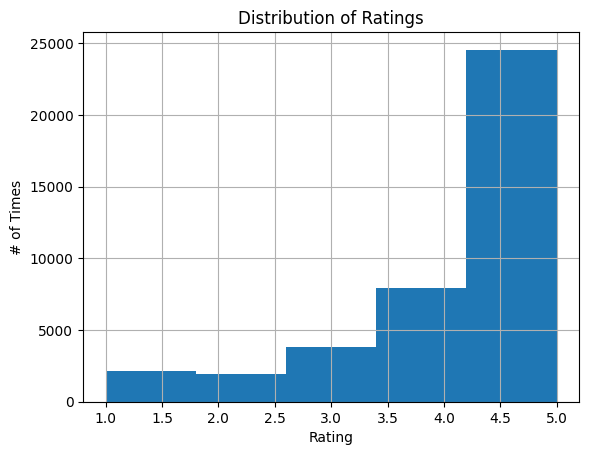

In [76]:
df["rating"].hist(bins=5)
plt.title("Distribution of Ratings (all)")
plt.xlabel("Rating")
plt.ylabel("# of Times")

Text(0, 0.5, '# of Times')

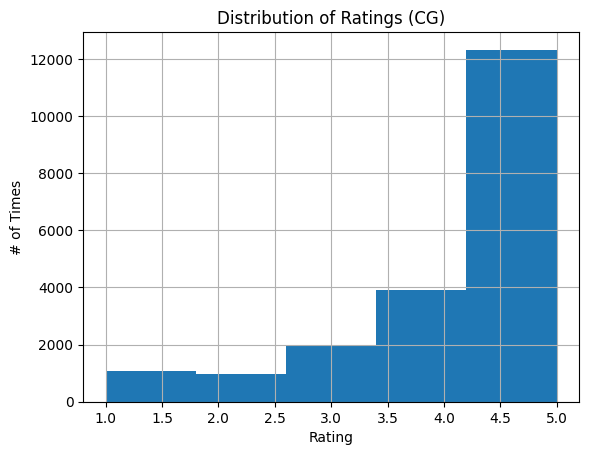

In [80]:
df["rating"].loc[df["label"] == "CG"].hist(bins=5)
plt.title("Distribution of Ratings (CG)")
plt.xlabel("Rating")
plt.ylabel("# of Times")

Text(0, 0.5, '# of Times')

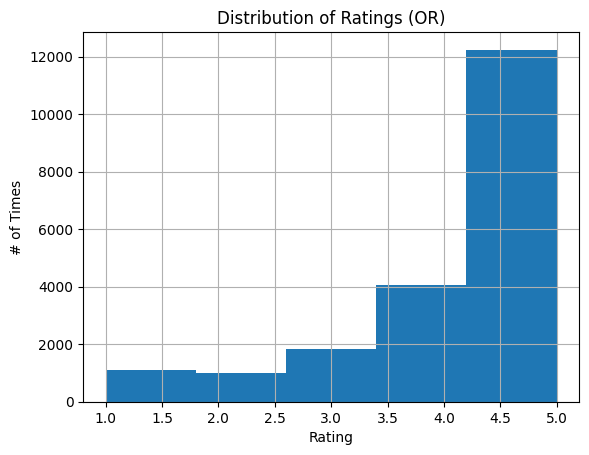

In [82]:
df["rating"].loc[df["label"] == "OR"].hist(bins=5)
plt.title("Distribution of Ratings (OR)")
plt.xlabel("Rating")
plt.ylabel("# of Times")

(-5721.55, 120152.55)

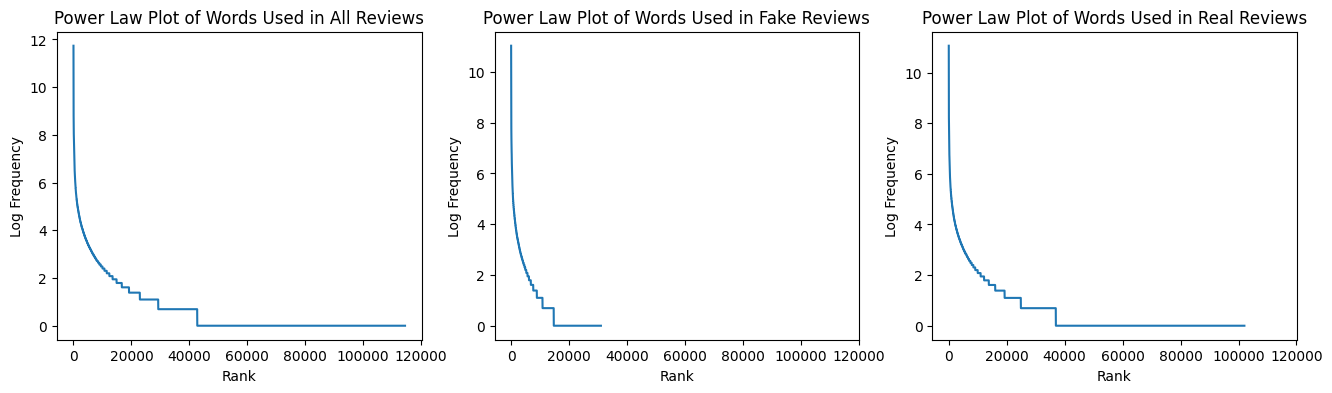

In [99]:
all_words = []
cg_words = []
or_words = []


for i in transformed_df.index:
    s = df.loc[i, "text_"]
    words = s.split(" ")
    if df.loc[i, "label"] == "CG":
        for w in words:
            all_words.append(w)
            cg_words.append(w)
    else:
        for w in words:
            all_words.append(w)
            or_words.append(w)
            
word_counts = pd.Series(all_words).value_counts()
cg_word_counts = pd.Series(cg_words).value_counts()
or_word_counts = pd.Series(or_words).value_counts()

nwords = word_counts.shape[0]
cg_nwords = cg_word_counts.shape[0]
or_nwords = or_word_counts.shape[0]

fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

axs[0].plot(range(0, nwords), np.log(word_counts))
axs[0].set_title("Power Law Plot of Words Used in All Reviews")
axs[0].set_xlabel("Rank")
axs[0].set_ylabel("Log Frequency")
axs[0].set_xlim((-word_counts.shape[0] / 20, word_counts.shape[0] * 1.05))


axs[1].plot(range(0, cg_nwords), np.log(cg_word_counts))
axs[1].set_title("Power Law Plot of Words Used in Fake Reviews")
axs[1].set_xlabel("Rank")
axs[1].set_ylabel("Log Frequency")
axs[1].set_xlim((-word_counts.shape[0] / 20, word_counts.shape[0] * 1.05))

axs[2].plot(range(0, or_nwords), np.log(or_word_counts))
axs[2].set_title("Power Law Plot of Words Used in Real Reviews")
axs[2].set_xlabel("Rank")
axs[2].set_ylabel("Log Frequency")
axs[2].set_xlim((-word_counts.shape[0] / 20, word_counts.shape[0] * 1.05))





The distribution of words used in the ratings does not closely follow <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/">Zipf's law</a>, but we do see the expected long tail of infrequently used words in the real reviews. The fake reviews appear to draw from a greatly restricted vocabulary, and many of the words used in fake reviews are not used in real reviews at all.

For a baseline, it seems reasonable to use the naive Bayes algorithm on bags of words (unigrams). This approach is known to work well for filtering spam email, and it will provide a good benchmark for gauging the effectiveness of more sophisticated algorithms. Scikit-learn provides a naive Bayes classifier, but it requires the documents to be presented as vectors of one-hot encoded variables, and we will want to use a sparse representation.